In [1]:
import svgsa
import decoupler as dc
import platform

In [2]:
seed = 37

In [3]:
# load data
adata, data_name = svgsa.load_pbmc68k_reduced(data_name=True)

# load gene sets
pgy = dc.get_progeny(organism = "human", top = 500)

# create dictionary    
gsts_dict = pgy.groupby("source")["target"].apply(lambda x: sorted(x)).to_dict()

In [4]:
adata

AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [5]:
# list of decoupler methods 
m = []
for method in range(5,11):
    m.append(dc.show_methods()["Function"][method][4:])
print(m)

['mlm', 'ora', 'udt', 'ulm', 'viper', 'wmean']


In [6]:
# list of genes to be used for GS
gs_list = None
#gs_list = ['Androgen', 'JAK-STAT', 'TNFa', 'Trail', 'VEGF']
#gs_list = ['Hypoxia', 'p53']
#gs_list = ['JAK-STAT', 'VEGF']
#gs_list = ['TNFa', 'VEGF']

In [7]:
# hyperparameters
z_dim_gs = 2
z_dim_uns = 0
epochs = 100
batch_size = 100

In [8]:
# directory path to save plots
os_name = platform.system()
if os_name == 'Windows':
    s = '\\'
elif os_name == 'Linux':
    s = '/'
else:
    print('Operating system not supported')

d = f'{s}plots{s}{data_name}{s}z_dim_gs{str(z_dim_gs)}_z_dim_uns{str(z_dim_uns)}{s}epochs_{str(epochs)}{s}batch_size_{batch_size}{s}'

In [9]:
# fit model
adata_new, model, loss, lrs, N_GS_list = svgsa.fit_SVGSA(adata, gsts_dict, z_dim_gs=z_dim_gs, z_dim_uns=z_dim_uns,
                                   
                                   num_iafs=0, batch_size=batch_size, epochs=epochs, seed=seed, 
                                   
                                   N_GS=14, normalize=False, CUDA=False, iaf_dim=50, fixed=True, gs_list=gs_list)

['Androgen', 'EGFR', 'Estrogen', 'Hypoxia', 'JAK-STAT', 'MAPK', 'NFkB', 'PI3K', 'TGFb', 'TNFa', 'Trail', 'VEGF', 'WNT', 'p53']
Mask shape: torch.Size([765, 14])


Epoch loss 712813.640000: 100%|██████████| 100/100 [00:43<00:00,  2.31it/s]


score:  tensor([[0.0473, 0.7493, 0.3802,  ..., 0.0497, 0.0281, 0.7042],
        [0.1713, 0.2213, 0.5178,  ..., 0.0266, 0.0170, 0.6909],
        [0.0980, 0.1148, 2.1340,  ..., 1.8035, 1.7177, 0.2953],
        ...,
        [0.2281, 1.1405, 1.8311,  ..., 0.2120, 0.3573, 1.2045],
        [0.8270, 0.4545, 1.2007,  ..., 0.0647, 0.5334, 0.6979],
        [0.5411, 1.8556, 0.1322,  ..., 0.0158, 0.0636, 1.7084]],
       grad_fn=<AbsBackward0>)


In [10]:
adata_new

AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain', 'Androgen', 'EGFR', 'Estrogen', 'Hypoxia', 'JAK-STAT', 'MAPK', 'NFkB', 'PI3K', 'TGFb', 'TNFa', 'Trail', 'VEGF', 'WNT', 'p53'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_svgsa', 'X_reconstructed', 'last_node', 'X_svgsa_gs', 'X_svgsa_uns'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

Running mlm on mat with 700 samples and 765 targets for 14 sources.


100%|██████████| 1/1 [00:00<00:00, 32.71it/s]

Running ora on mat with 700 samples and 765 targets for 14 sources.



100%|██████████| 700/700 [00:00<00:00, 1744.39it/s]


Running udt on mat with 700 samples and 765 targets for 14 sources.


100%|██████████| 700/700 [00:04<00:00, 150.97it/s]


Running ulm on mat with 700 samples and 765 targets for 14 sources.


100%|██████████| 1/1 [00:00<00:00, 122.58it/s]


Running viper on mat with 700 samples and 765 targets for 14 sources.
Infering activities on 1 batches.


100%|██████████| 1/1 [00:00<00:00,  8.29it/s]


Computing pleiotropy correction.


100%|██████████| 700/700 [00:00<00:00, 8951.31it/s]


Running wmean on mat with 700 samples and 765 targets for 14 sources.


100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


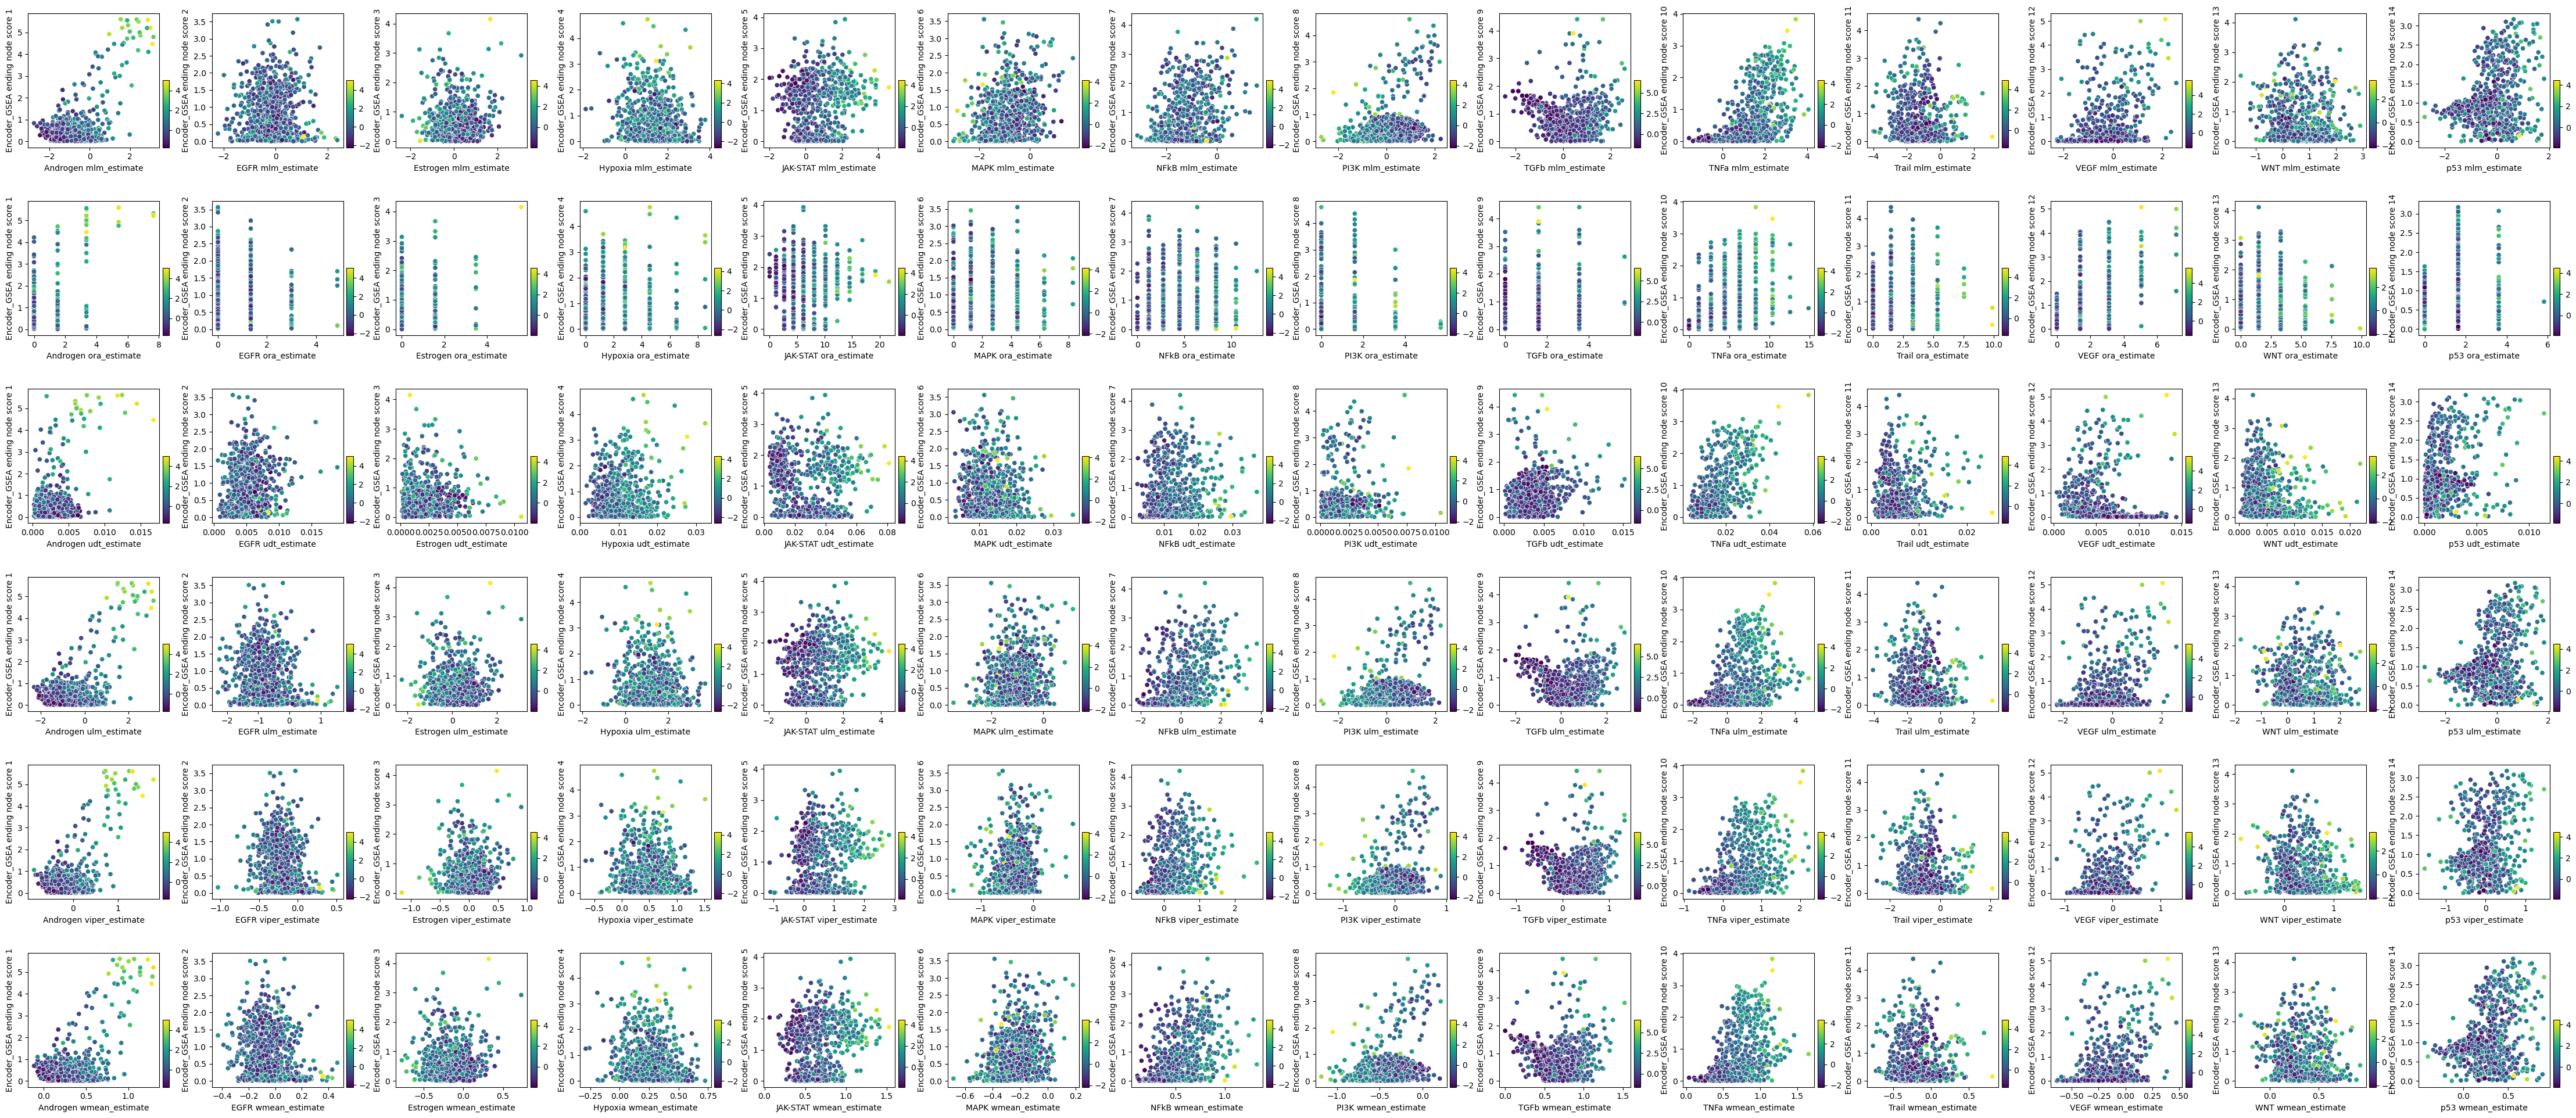

In [11]:
svgsa.decoupler_comparison(N_GS_list, adata_new, pgy, method_list=m, save_directory=d)

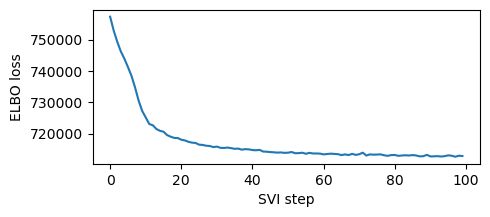

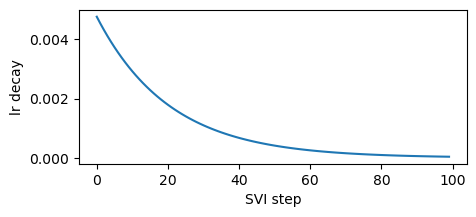

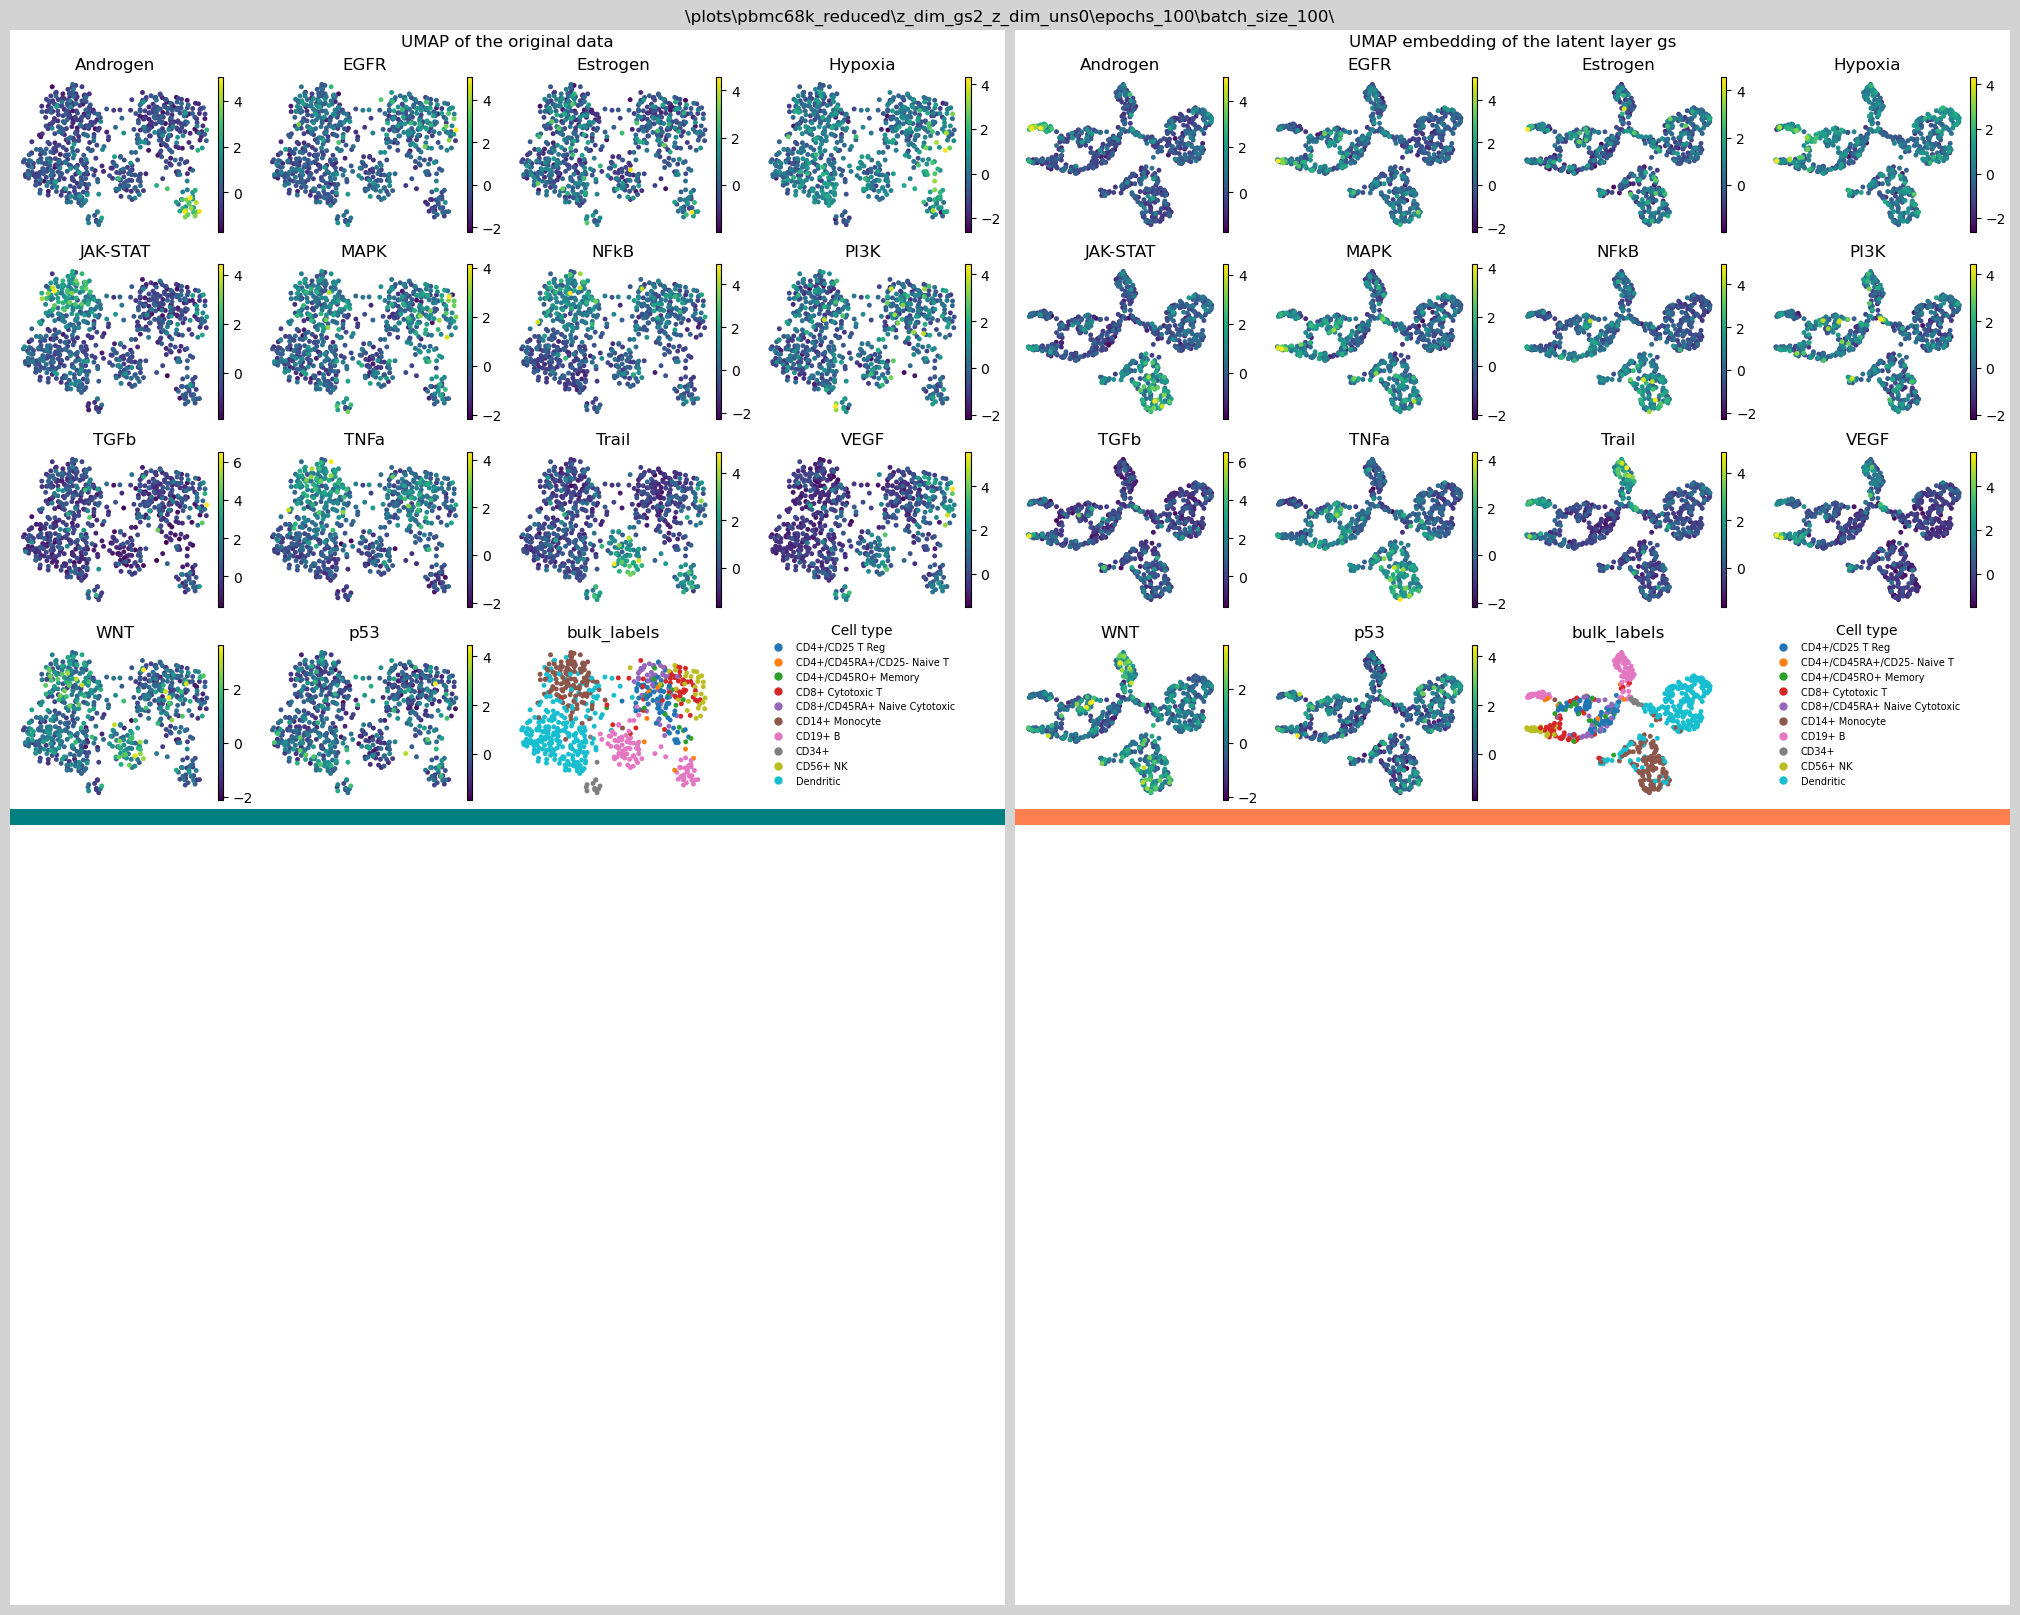

In [12]:
svgsa.plot_loss(loss, save_directory=d)

svgsa.plot_learning_rate_decay(lrs, save_directory=d)

#rep = ['X', 'X_svgsa', 'X_svgsa_gs', 'X_svgsa_uns']
rep = ['X', 'X_svgsa_gs']

svgsa.umap_full_plot(adata_new, rep, N_GS_list, color_label = "bulk_labels", save_directory=d)